# Lecture 1: Data preprocessing

## Copyright
These notebooks, authored by Hussain Kazmi, are licensed under the AGPL License; you may not use this file except in compliance with the License. Notebooks are distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. Support from KU Leuven and InnoEnergy is gratefully acknowledged.

## Background

Many data scientists estimate that more than half of their job consists of acquiring the correct data and then getting rid of irregularities in it. This is often referred to as the preprocessing step. Data wrangling, a closely related concept, refers to the process of transforming raw data into a form that is more suitable for downstream analysis such as forecasting and optimization. Taken together, they represent the necessary steps before data analysis.

In this session, we begin by considering the different elements in this pipeline, ranging from loading data to visualizing, filtering and resampling it. We also introduce a number of strategies to deal with missing data.

## Loading data
There are a number of ways in which data can be loaded into your program for processing. This includes loading data directly from .csv files (which are interoperable with Excel), [pickle](https://docs.python.org/2/library/pickle.html) files (which are a Python data format for storing binary data), and [H5py](https://www.h5py.org) files (which are a file format for large datasets), besides many others. It is also obviously possible (in fact quite common) to retrieve data from databases or through web APIs.

This section introduces how to load data in a number of different formats, and what these different choices can mean for the execution speed of your program.

### Reading from CSV files

In this lecture and the remainder of the course, we will rely heavily on [numpy](https://numpy.org) and [pandas](https://pandas.pydata.org). While numpy is a general purpose toolbox for manipulating numerical data in the form of arrays, matrices and tensors in Python, pandas allows users to work with structured datasets (e.g. in case your data has both numerical and categorical values etc.). It also offers users a large variety of built-in utilities to quickly process the data. These are, of course, handy tools that minimize the amount of work you need to do before you get to the interesting part, which is data analysis.

We begin by importing the libraries that we will use in this lecture. In case you do not have one or more of these libraries, Python will throw an error. In this case, you will need to install the necessary libraries depending on the operating system. This can often be done using the [pip](https://pip.pypa.io/en/stable/quickstart/) package, although other ways exist as well (for instance, through a package manager).

In [ ]:
import pandas as pd
import numpy as np
import datetime # To measure execution time etc.
import pickle # To load files stored in the Pickle format
import matplotlib.pyplot as plt # For visualizing data
!pip install missingno
import missingno as msno # For dealing with missing values in the data
import io
!pip install -U ipykernel
!pip install modin[dask]
import modin.pandas as modpd

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 691 kB 17.0 MB/s 
     |████████████████████████████████| 10.8 MB 39.3 MB/s 
     |████████████████████████████████| 977 kB 27.7 MB/s 
     |████████████████████████████████| 1.0 MB 43.4 MB/s 
     |████████████████████████████████| 115 kB 38.7 MB/s 
     |████████████████████████████████| 296 kB 47.3 MB/s 
     |████████████████████████████████| 273 kB 42.6 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.5
    Not uninstalling pandas at /shared-libs/python3.7/py/lib/python3.7/site-packages, outside environment /root/venv
    Can't uninstall 'pandas'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


AttributeError: module 'pandas' has no attribute 'read_xml'

Now, we can use the pandas library to import the csv file containing our data. This file exists in the same folder and can therefore be read simply with the read_csv command from the Pandas library. In case, you wish to load a file from a different folder, you will need to specify the appropriate path. 

In [ ]:
cons = pd.read_csv('LoadData.csv', header=None, prefix='House')

A few important input arguments for the _read_csv_ function include:
1. _header_: defining the headers in the input csv data (in this case we set it to None to avoid setting the first row as header names); 
2. _Sep_ and _delimiter_: these are used to identify how subsequent entries are read in the csv file (comma by default, a csv file literally is an abbreviation of a comma separated value file);
3. _decimal_: defines the character to recognize as decimal point (e.g. you will need to use ‘,’ for data originating from some European sources);
4. _usecols_: This argument can be used to read only a subset of the columns. Using this parameter can result in much faster parsing time and lower memory usage (depending on the chosen subset).

There are also a number of other interesting arguments to the _read_csv_ function, which can be used to deal with specific cases. For more information, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). These are not too important for now, as the data we are considering is not big at all.

You will note that we are also adding a prefix in the _read_csv_ function now. This has fundamentally the effect of adding a _House_ as a prefix to all the column names in the loaded dataset.

The data itself can be seen as a matrix which can be interpreted as:
1. The columns represent individual buildings: each column is electricity demand data for one (simulated) Belgian household (in total, 200 buildings).
2. The rows represent time: each row is a new time step, so row 1 corresponds to electricity demand in all the buildings on the first time step and so on.

This data consists of electricity demand data from 200 (simulated) buildings, sampled at a 15 minute interval (i.e. quarter hourly), for a total of 350 days. More details about this dataset can be found [here](http://dx.doi.org/10.1109/TII.2013.2240309). If you want to use the data in your projects, please cite: W. Labeeuw, G. Deconinck, "Residential Electrical Load Model based on Mixture Model Clustering and Markov Models," IEEE Trans. on Industrial Informatics, Vol. 9, No. 3, Aug. 2013, pp. 1561-1569.

To see all the columns in your dataframe, use .columns. Informative naming of columns can go a long way in minimizing documentation requirements later in the project.

In [ ]:
print(cons.columns)

Index(['House0', 'House1', 'House2', 'House3', 'House4', 'House5', 'House6',
       'House7', 'House8', 'House9',
       ...
       'House190', 'House191', 'House192', 'House193', 'House194', 'House195',
       'House196', 'House197', 'House198', 'House199'],
      dtype='object', length=200)


This does not show all the columns, as you may have guessed from the ellipsis (...). This can be remedied easily by casting the column names into a list.

In [ ]:
print(list(cons.columns))

['House0', 'House1', 'House2', 'House3', 'House4', 'House5', 'House6', 'House7', 'House8', 'House9', 'House10', 'House11', 'House12', 'House13', 'House14', 'House15', 'House16', 'House17', 'House18', 'House19', 'House20', 'House21', 'House22', 'House23', 'House24', 'House25', 'House26', 'House27', 'House28', 'House29', 'House30', 'House31', 'House32', 'House33', 'House34', 'House35', 'House36', 'House37', 'House38', 'House39', 'House40', 'House41', 'House42', 'House43', 'House44', 'House45', 'House46', 'House47', 'House48', 'House49', 'House50', 'House51', 'House52', 'House53', 'House54', 'House55', 'House56', 'House57', 'House58', 'House59', 'House60', 'House61', 'House62', 'House63', 'House64', 'House65', 'House66', 'House67', 'House68', 'House69', 'House70', 'House71', 'House72', 'House73', 'House74', 'House75', 'House76', 'House77', 'House78', 'House79', 'House80', 'House81', 'House82', 'House83', 'House84', 'House85', 'House86', 'House87', 'House88', 'House89', 'House90', 'House91

There you have it, successfully loaded data from 200 different houses! Note that you can print out prettier looking lists using the pprint command.

### First steps with the data

The _head_ function in Pandas provides a quick overview of the contents of the dataframe you just loaded. Note that this command displays a subset of data at the beginning of the data frame (i.e. the first 5 rows by default).

In [ ]:
cons.head()

,House0,House1,House2,House3,House4,House5,House6,House7,House8,House9,...,House190,House191,House192,House193,House194,House195,House196,House197,House198,House199
0,0.92,0.46,0.00,0.74,0.19,0.0,0.26,0.19,0.10,0.96,...,0.0,0.28,0.19,0.33,0.11,0.0,0.54,0.39,0.46,0.24
1,2.55,0.19,0.00,0.71,0.19,0.0,0.18,0.27,0.09,0.19,...,0.0,0.34,0.21,0.26,0.05,0.0,0.62,0.35,0.36,0.28
2,0.27,0.19,0.00,0.75,0.13,0.0,0.14,0.21,0.09,0.25,...,0.0,0.23,0.21,0.10,0.05,0.0,0.50,0.27,0.19,0.29
3,0.13,0.21,0.16,1.29,0.19,0.0,0.47,0.19,0.18,0.22,...,0.0,0.25,0.19,0.16,0.05,0.0,0.65,0.27,0.15,0.10
4,0.08,0.23,0.19,1.35,0.24,0.0,0.31,0.13,0.27,0.13,...,0.0,0.17,0.43,0.53,0.05,0.0,0.48,0.26,0.15,0.08


You can increase or decrease the number of rows the _head_ function returns by passing an integer as an argument.

In [ ]:
cons.head(10)

,House0,House1,House2,House3,House4,House5,House6,House7,House8,House9,...,House190,House191,House192,House193,House194,House195,House196,House197,House198,House199
0,0.92,0.46,0.00,0.74,0.19,0.0,0.26,0.19,0.10,0.96,...,0.0,0.28,0.19,0.33,0.11,0.00,0.54,0.39,0.46,0.24
1,2.55,0.19,0.00,0.71,0.19,0.0,0.18,0.27,0.09,0.19,...,0.0,0.34,0.21,0.26,0.05,0.00,0.62,0.35,0.36,0.28
2,0.27,0.19,0.00,0.75,0.13,0.0,0.14,0.21,0.09,0.25,...,0.0,0.23,0.21,0.10,0.05,0.00,0.50,0.27,0.19,0.29
3,0.13,0.21,0.16,1.29,0.19,0.0,0.47,0.19,0.18,0.22,...,0.0,0.25,0.19,0.16,0.05,0.00,0.65,0.27,0.15,0.10
4,0.08,0.23,0.19,1.35,0.24,0.0,0.31,0.13,0.27,0.13,...,0.0,0.17,0.43,0.53,0.05,0.00,0.48,0.26,0.15,0.08
5,0.07,0.31,0.05,1.31,0.24,0.0,0.06,0.16,0.20,0.25,...,0.0,0.21,0.29,0.50,0.13,0.00,0.52,0.37,0.15,0.21
6,0.06,0.27,0.03,1.27,0.16,0.0,0.07,0.11,0.19,0.03,...,0.0,0.22,0.19,0.77,0.08,2.80,0.71,0.36,0.14,0.16
7,0.09,0.37,0.13,1.26,0.13,0.0,0.10,0.13,0.11,0.05,...,0.0,0.27,0.21,0.35,0.13,3.20,0.52,0.33,0.15,0.23
8,0.15,0.31,0.13,1.27,0.19,0.0,0.16,0.19,0.09,0.14,...,0.0,0.17,0.21,0.15,0.96,4.63,0.69,0.35,0.15,0.17
9,0.16,0.29,0.27,1.29,0.16,0.0,0.05,0.24,0.09,0.04,...,0.0,0.19,0.19,0.25,0.13,4.77,0.56,0.32,0.15,0.07


Alternatively, you can also explore the last few rows of your dataframe with the _tail_ command:

In [ ]:
cons.tail()

,House0,House1,House2,House3,House4,House5,House6,House7,House8,House9,...,House190,House191,House192,House193,House194,House195,House196,House197,House198,House199
33595,0.78,0.27,0.16,0.37,1.39,0.13,0.10,0.35,0.60,0.12,...,0.0,0.36,0.43,0.67,0.13,0.00,0.52,0.86,1.40,0.31
33596,0.78,0.25,0.11,0.36,1.33,0.16,0.21,0.32,0.54,0.11,...,0.0,0.32,0.61,0.48,0.13,0.00,0.54,0.63,0.53,0.28
33597,0.47,0.27,0.08,0.36,0.96,0.08,0.17,0.35,0.48,0.09,...,0.0,0.31,0.77,0.48,0.05,0.77,0.67,0.61,0.49,0.22
33598,0.29,0.25,0.00,0.36,0.35,0.08,0.18,0.35,0.43,0.17,...,0.0,0.28,0.53,1.91,0.05,3.11,0.48,0.50,0.45,0.25
33599,0.13,0.27,0.16,0.39,0.32,0.16,0.31,0.32,0.32,0.12,...,0.0,0.63,0.40,2.35,0.32,3.15,0.65,0.54,0.31,0.31


If you want to look at an individual row in the dataframe, you can use the _iloc_ keyword along either dimension (where the first index is for rows and the second is for columns):

In [ ]:
print('Electricity demand for the first 3 houses on the first time instant:')
print(cons.iloc[0,0:3])
print()

print('Electricity demand for the first house on the first 3 time instants:')
print(cons.iloc[0:3,0])
print()

print('Electricity demand for the first 3 houses on the first 3 time instants:')
print(cons.iloc[0:3,0:3])
print()

Electricity demand for the first 3 houses on the first time instant:
House0    0.92
House1    0.46
House2    0.00
Name: 0, dtype: float64

Electricity demand for the first house on the first 3 time instants:
0    0.92
1    2.55
2    0.27
Name: House0, dtype: float64

Electricity demand for the first 3 houses on the first 3 time instants:
   House0  House1  House2
0    0.92    0.46     0.0
1    2.55    0.19     0.0
2    0.27    0.19     0.0



You can also drill into any column by using either _dataframe.columnName_ or _dataframe['columnName']_. An example with both is given below, note that the output is the same for both.

In [ ]:
print(cons.House1.head())
print(cons['House1'].head())

0    0.46
1    0.19
2    0.19
3    0.21
4    0.23
Name: House1, dtype: float64
0    0.46
1    0.19
2    0.19
3    0.21
4    0.23
Name: House1, dtype: float64


In addition to looking at individual rows of the dataframe, you can also check out the dimensions of the dataframe you are analyzing using the _shape_ attribute. Note that you do not require the parenthesis you used with _head_ here. This can be useful when you're loading data from a known source, or want to check the dimensions of the data you are working with.

In [ ]:
cons.shape

(33600, 200)

Likewise, you can also check the type of the data you are working with using the _type_ function. The _type_ function also works with subsets of the dataframe (using _.iloc_ as before).

In [ ]:
print(type(cons))
print(type(cons.iloc[:,0]))
print(type(cons.iloc[0,0]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.float64'>


Notice that the type of a single row or column of a dataframe is different from that of the entire dataframe (or a 2-D slice of the dataframe). Likewise, if you index into a single element, _type_ will return the data type of that single element which can be, for instance, an integer (int) or| a real number (float) etc.

Perhaps more interesting than looking at individual rows or columns of a dataframe is , you can summarize the contents of the dataframe with the _describe_ command. This command allows you to quickly calculate important summary statistics (e.g. mean, standard deviation, maximum and minimum) for each column of your data.

In [ ]:
cons.describe()

,House0,House1,House2,House3,House4,House5,House6,House7,House8,House9,...,House190,House191,House192,House193,House194,House195,House196,House197,House198,House199
count,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,...,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000
mean,0.330208,0.316335,0.244375,0.628489,0.599528,0.309473,0.291320,0.331802,0.302160,0.258453,...,0.435680,0.621643,0.522336,0.353270,0.290898,0.538257,0.607782,0.396124,0.385906,0.460257
std,0.405302,0.427178,0.410911,0.366304,0.839402,0.615677,0.367698,0.349061,0.270543,0.407155,...,1.927502,0.647286,0.535197,0.439445,0.478627,1.206379,0.306143,0.254784,0.435586,0.390434
min,0.050000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.130000,0.000000,0.020000,0.000000,0.000000,0.000000,0.070000,0.000000,0.000000
25%,0.120000,0.150000,0.050000,0.360000,0.130000,0.030000,0.120000,0.190000,0.160000,0.040000,...,0.000000,0.270000,0.240000,0.150000,0.050000,0.000000,0.440000,0.260000,0.160000,0.230000
50%,0.200000,0.230000,0.130000,0.550000,0.240000,0.110000,0.190000,0.240000,0.230000,0.110000,...,0.000000,0.370000,0.320000,0.230000,0.110000,0.000000,0.520000,0.350000,0.270000,0.310000
75%,0.350000,0.310000,0.240000,0.950000,0.640000,0.320000,0.290000,0.320000,0.350000,0.260000,...,0.000000,0.710000,0.560000,0.370000,0.210000,0.290000,0.620000,0.470000,0.460000,0.590000
max,4.760000,6.900000,4.350000,3.020000,8.000000,8.800000,4.270000,5.170000,3.790000,4.790000,...,10.330000,7.290000,6.400000,5.560000,6.370000,7.070000,4.480000,3.800000,4.020000,4.710000


### Analyzing different file formats 

In this section, we analyze the performance of different input file formats (csv and python-specifc pickle format) along two different dimensions:

1. The time it takes to load the file into memory
2. The memory the loaded file consumes once it has been loaded

In this cell, we use the _datetime_ library to estimate how much time it takes to read the csv file. Likewise, you can use the _info_ function to see the memory usage of the dataframe (note this is different than the _describe_ function we discussed earlier). 

In [ ]:
start = datetime.datetime.now()
cons = pd.read_csv('LoadData.csv', header=None)
end = datetime.datetime.now()

print('Load time (with csv file): ' + str(end - start))
print(cons.info())

Load time (with csv file): 0:00:00.872457
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Columns: 200 entries, 0 to 199
dtypes: float64(200)
memory usage: 51.3 MB
None


With large files, the time it takes to read the input data can be a serious concern (especially if the read operation has to be repeated multiple times). Furthermore, the memory a dataframe consumes can be greater than the available RAM, which would lead your program to crash. Even though this is not a concern with the files we are working in this lecture, in cases where you already know if you will only be working with a subset of the data, you can make that choice before loading your data with the usecols argument.

In [ ]:
start = datetime.datetime.now()
cons = pd.read_csv('LoadData.csv', header=None, usecols=[0])
end = datetime.datetime.now()

print('Load time (with csv file): ' + str(end - start))
print(cons.info())

Load time (with csv file): 0:00:00.262411
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       33600 non-null  float64
dtypes: float64(1)
memory usage: 262.6 KB
None


Setting _usecols_ to the 0th column forces the _read_csv_ function to read only the first column of the csv file. This corresponds to the electricity demand for the first building. The practical effect of this is a much reduced memory footprint and also the time it took to load the file.

Meanwhile, loading the same data but stored in a Pickle file (instead of a csv) can also provide a speedup in terms of the time required to read it. The pickle module is used widely by the Python community to serialize and de-serialize different Python object structures (such as arrays, dataframes and even machine learning models etc.). “Pickling” is the process whereby this object is converted into a byte stream, and “unpickling” is the inverse operation. Keep in mind that the pickle module is not secure and it is possible to construct malicious pickle data which will execute arbitrary code during unpickling.

In [ ]:
start = datetime.datetime.now()
cons = pickle.load(open("LoadData_subset.p", "rb"))
end = datetime.datetime.now()

print('Load time (with pickle file): ' + str(end - start))
print(cons.info())

Load time (with pickle file): 0:00:00.003101
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       33600 non-null  float64
dtypes: float64(1)
memory usage: 262.6 KB
None


You can also load just the subset of data you are interested in, if you have already saved it into the appropriate pickle file beforehand. This file should be exactly the file that was loaded with the _read_csv_ function with the _usecols_ argument set to 0. However, it introduces an extra step of first reading the csv file, then creating a pickle with the subset of interest, and subsequently only loading and working with this data.

In [ ]:
start = datetime.datetime.now()
cons = pickle.load(open("LoadData_subset.p", "rb"))
end = datetime.datetime.now()

print('Load time with pickled subset): ' + str(end - start))
print(cons.info())

Load time with pickled subset): 0:00:00.003278
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       33600 non-null  float64
dtypes: float64(1)
memory usage: 262.6 KB
None


You can also use the popular _h5_ file format to load in your data. This is designed specifically to provide a further speed-up. The h5py package is a Pythonic interface to the HDF5 binary data format. This data format provides a cross-platform way (the files are interoperable with a broad range of programming languages and platforms) to store and easily manipulate huge amounts of numerical data (especially useful when you are working with terabyte datasets stored on disk). It is important to note that the H5 files are not read directly into memory, rather only a pointer is created to these files.

### Exercises
1. What is the difference between csv, pickle and H5 files?
2. Can you directly load a subset of data from Pickle files?
3. Why is there a speed-up when loading Pickle files as compared to CSVs?
4. Are there any serious disadvantages of using Pickle files as opposed to CSVs?
5. How do the loading times of these file formats (csv and pickle) increase with increasing file sizes? One way to estimate this is to try to load increasingly bigger files with all formats and plot the results out (x-axis: file size, y-axis: time to load the file in memory)


### Intermezzo: speeding up Pandas 

#### Using [Modin](https://github.com/modin-project/modin)

The modin.pandas DataFrame is an extremely light-weight parallel DataFrame that works on top of regular Pandas dataframes. You can use it to transparently distribute the data and computation in a parallel way, while still using the pandas API as before. Modin can provide speed-ups of up to 4x on a laptop with 4 physical cores. Note that not the entire functionality of Pandas is available with Modin. For more information on which functions are supported and which are not, check out the documentation.

How Modin accelerates your code: Pandas typically uses a single core (in a serial fashion) to read and process data. Modin leverages all the available CPU cores on a machine to accelerate data processing. An example to use Modin is given next to read the data we were working with previously. Note that there is no difference in the syntax from before. 

When to use such solutions: Whether you need to use Modin or not depends entirely on your use case and the hardware resources you have available: for instance if you are working with large datasets on a powerful workstation, Modin (or a similar library) can be a useful choice. If you are working on your laptop with a reasonably sized dataset (e.g. in KB's or MB's), then the utility of Modin (or a similar architecture) is questionable.

In [ ]:
import modin.pandas as modpd

start = datetime.datetime.now()
cons = modpd.read_csv('LoadData.csv', header=None)
end = datetime.datetime.now()

print('Load time (with csv file): ' + str(end - start))
print(cons.info())

To remove this warning, run the following python code before doing dataframe operations:

    from distributed import Client

    client = Client()

Load time (with csv file): 0:00:03.325187
<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Columns: 200 entries, 0 to 199
dtypes: float64(200)
memory usage: 51.3 MB
None


#### Downsizing  data types
In many cases, when working with large datasets, it can also be useful to downsize your dataset (this is possible to do even after you have loaded it). For instance, recall from earlier that the data type of a single element was numpy.float64 (you can check this using print(type(cons.iloc[0,0]))). Numpy supports a large number of data types suhc as float16, float32 and float64 for dealing with real numbers with increasing precision.

In [ ]:
cons_downsized = cons.astype('float16')
cons_downsized.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Columns: 200 entries, 0 to 199
dtypes: float16(200)
memory usage: 12.8 MB


What is happening here fundamentally is that the computer is using a coarser representation to store the same numbers. This will result in some loss of fidelity naturally (quantization error). However, in some cases, this trade off between accuracy and file size can be justified, especially when working with very large datasets that do not fit into memory (e.g. greater than tens or hundreds of GB's).

Note that this type cast makes sense once you have already loaded a dataframe into memory. For the case where you have not yet loaded the data into memory yet, you can simply set the _dtype_ to the desired value as an argument in the _read_csv_ function.

## Visualizing and working with data

Now that we know how our dataframe is organized, we can begin with the more exciting task of visualizing consumption patterns in different households. This is straightforward using Matplotlib (recall we imported matplotlib at the start of the notebook as plt). The syntax used by Matplotlib is fairly similar to that used in Matlab, and it provides a lot of different capabilities for plotting out of the box. Here, we explore some of the core functionality enabled by matplotlib.

In [ ]:
cons = pd.read_csv('LoadData.csv', header=None, prefix='House')

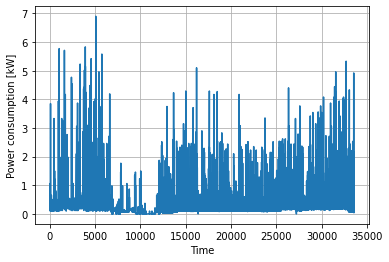

In [ ]:
plt.plot(cons.House1)
plt.xlabel('Time')
plt.ylabel('Power consumption [kW]')
plt.grid(True)
plt.show()

The figure size is a bit small, and it is quite difficult to see clearly what is going on. However, it is possible to increase the figure size to make things clearer. Likewise, updating the size of fonts is quite straightforward as well.

In [ ]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams.update({'font.size': 15})

This does not take effect retroactively. So, if you want these changes to be reflected in your plots, you will have to manually rerun the code generating the graphics. You can also play with different attributes in the plot functionality to improve readability. You can also use the linewidth argument in the _plot_ function to visualize dense information better.

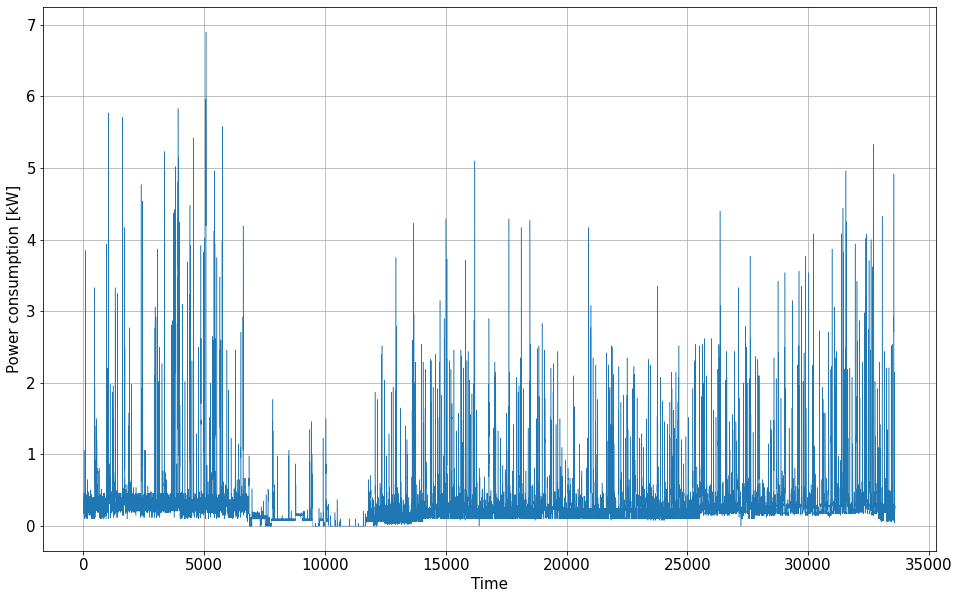

In [ ]:
plt.plot(cons.House1, linewidth=.5)
plt.xlabel('Time')
plt.ylabel('Power consumption [kW]')
plt.grid(True)
plt.show()

While it is easier to understand the energy demand better now, it is possible to select only a subset of data for even clearer visualization. Here, picking a week of data to visualize, we get:

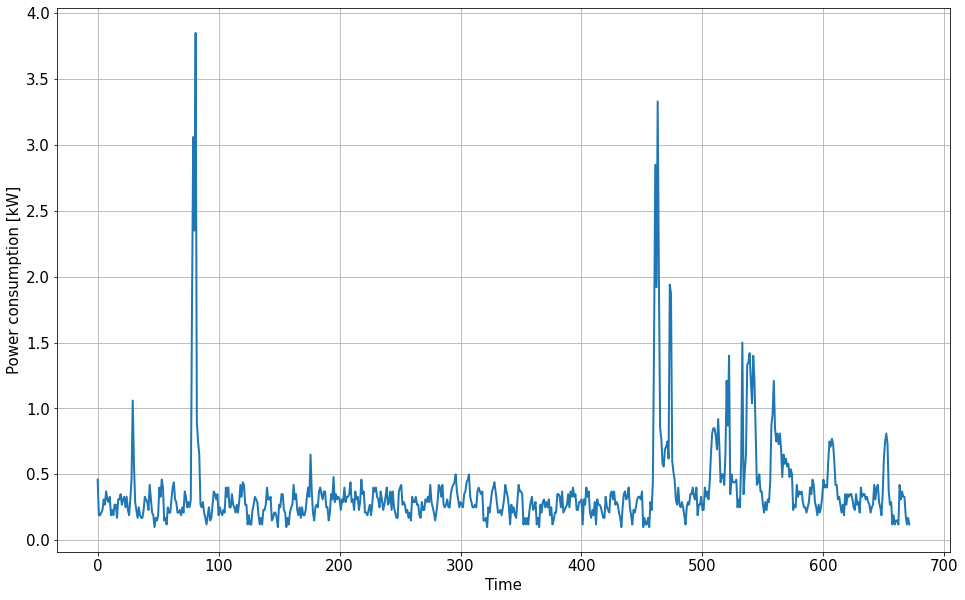

In [ ]:
start_index = 0
end_index = 96*7 # 96 quarters for 7 days
plt.plot(cons.House1[start_index:end_index], linewidth=2)
plt.xlabel('Time')
plt.ylabel('Power consumption [kW]')
plt.grid(True)
plt.show()

It seems that there is some periodic component to the signal, but there is too much information for it to be clearly visible. We can use many different strategies to understand the signal better:
1. Reshaping the data
2. Summarizing the data
3. Filtering the data
4. Aggregating data to a lower resolution
5. Use interactive visualizations (which allow zooming / panning into or out of certain parts of the time series).

### Reshaping and summarizing the time series

It is possible to reshape a time series to better understand underlying dynamics. The time series is sampled at quarterly intervals, so there are 96 samples / day. By reordering the 1D time series to a 2D matrix (where we have  on the x-axis and  on the y-axis), it is easier to understand broad patterns in the data. The easiest way to do this in Python is using the _reshape_ function from numpy. To do this, we first retrieve the energy demand of a single house as a numpy array, and then reshape it.

In [ ]:
demand1D = np.array(cons.House1)
number_quarters = 96
number_days = int(demand1D.shape[0]/number_quarters)
demand2D = demand1D.reshape(number_days, number_quarters)

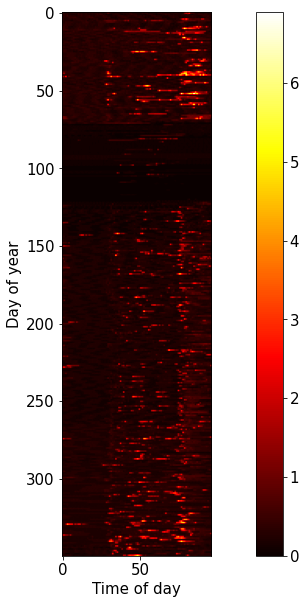

In [ ]:
plt.imshow(demand2D, cmap='hot')
plt.xlabel('Time of day')
plt.ylabel('Day of year')
plt.colorbar()
plt.show()

That looks much better! A diurnal trend is now clearly visible (high demand during the day and low demand during the night hours). 

### Summarizing the data

As a next step, it is instructive to summarize it along both axis (the x-axis is the time of day, the y-axis is the day of year). This is easily done by using the _axis_ argument in the _mean_ function in numpy.

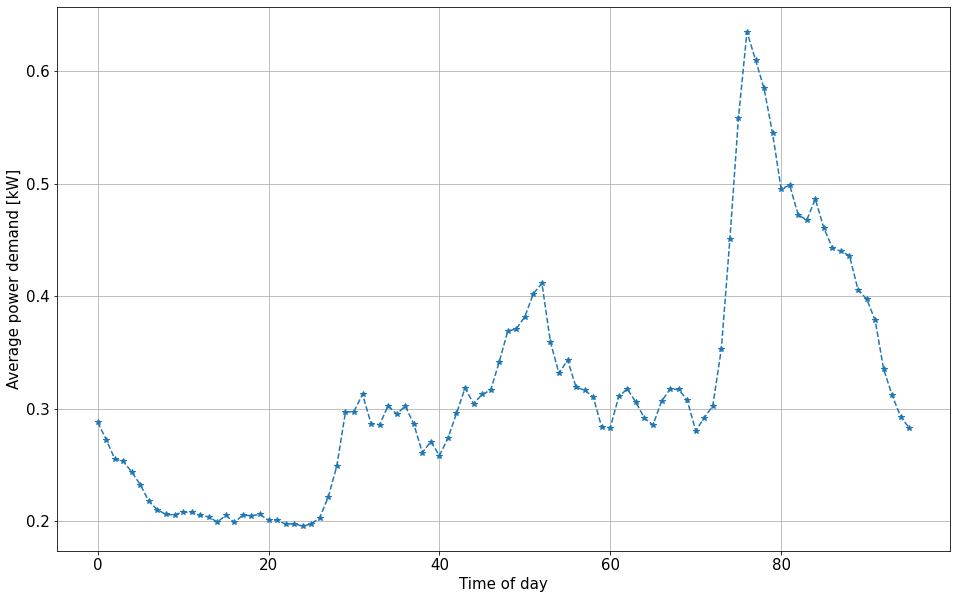

In [ ]:
plt.plot(np.mean(demand2D, axis=0), '*--')
plt.xlabel('Time of day')
plt.ylabel('Average power demand [kW]')
plt.grid(True)
plt.show()

It is obvious now that the demand during the middle of the night (between 3am to 6am) is at its lowest. Moreover, this trough is about a factor of 3.5 times lower than the peak during the evening. Also note the very fast ramp in the evening where the demand grows by almost a factor of two in a matter of an hour. These high ramping rates can cause problems for the system operator, especially in the case where they align with decreasing solar PV production. Aggregation of demand over many different consumers tends to smooth out these rapid fluctuations in energy demand. 

Note that this plot only shows the mean demand throughout the day, it does not show how the values are distributed around this mean, i.e. if the variability in demand is high or low at a certain point of the day or not. You can visualize this by plotting out all the days of the year as independent time series with the mean value overlaid.

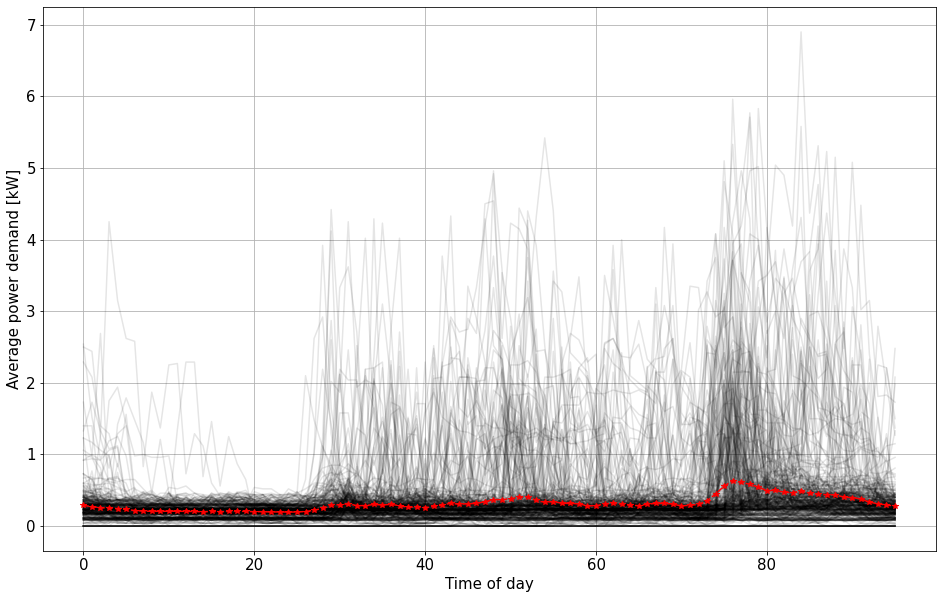

In [ ]:
plt.plot(demand2D.T, alpha=.1, color='black')
plt.plot(np.mean(demand2D, axis=0), '*--', color='red')
plt.xlabel('Time of day')
plt.ylabel('Average power demand [kW]')
plt.grid(True)
plt.show()

This plot shows two things:
1. The variability during different times of the day is quite different. The mean demand is lowest during the night, when the variability is also very low. Likewise, during the evening both the mean and variance are highest in the time series.
2. The differences in mean are actually very small compared to the actual demand values (i.e. calculating the mean is smoothing out the time series). 

We can verify these conclusions by calculating a box plot of the 2D demand signal. You can use the _boxplot_ function from matplotlib to create such a visualization (keep in mind that it can take a while to draw a boxplot).

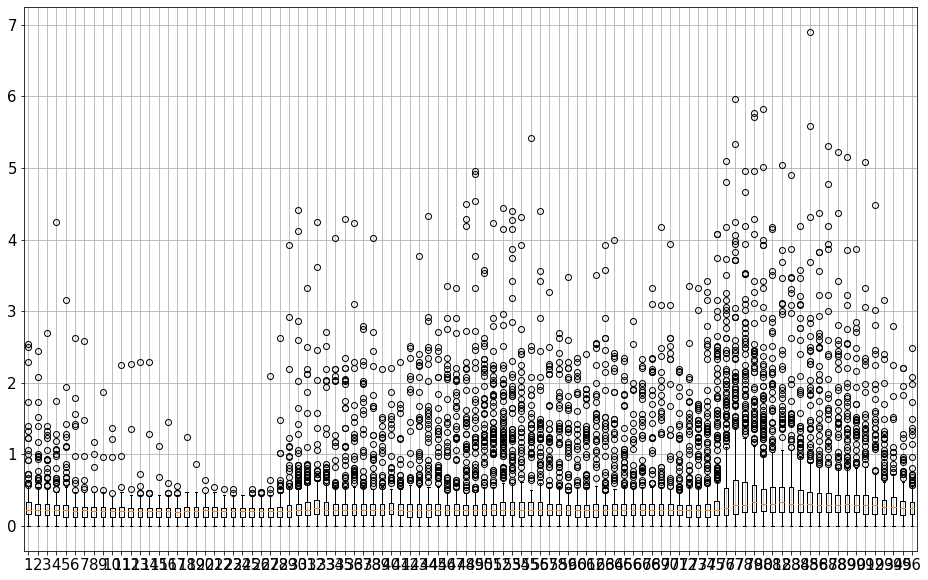

In [ ]:
plt.boxplot(demand2D)
plt.grid(True)
plt.show()

The boxplot verifies our earlier findings. Keep in mind that a boxplot is a technique that allows one to visualize groups of numerical data through their quartiles. Boxplots are non-parametric, in the sense that they display the variability in the data without making any assumptions of the underlying statistical distribution. A boxplot usually has a few components:

1. The median, shown here as the red horizontal line in the middle of the box
2. The box, which shows the 25th to 75th quartile of the data by default
3. The 'whiskers' (i.e. the vertical lines extending from the boxes) which shows the 5th to 95th percentile by default
4. The individual points, which extend beyond these percentiles, might be considered as outliers under specific conditions.

Finally, let us check to see if there is a clear seasonal trend (on a daily level) to the electricity demand in the household under consideration.

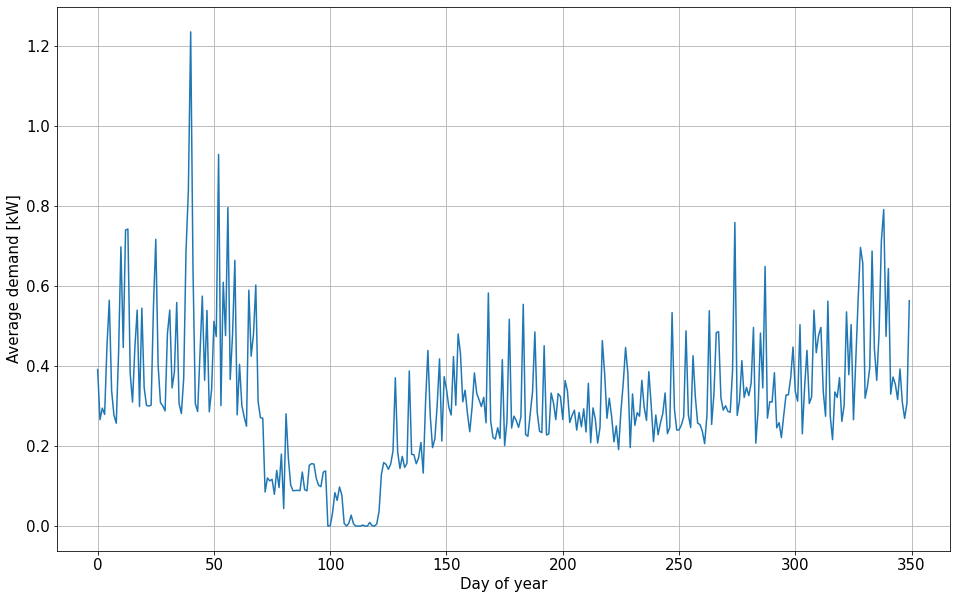

In [ ]:
plt.plot(np.mean(demand2D, 1))
plt.xlabel('Day of year')
plt.ylabel('Average demand [kW]')
plt.grid(True)
plt.show()

It is quite obvious from the data that something strange happened between the second and fourth month (roughly day 70 to 120) when demand plummeted. In real situations, this can be either due to problems with data collection or underlying changes in demand patterns (e.g. householders leaving on holidays etc.).

One more visualization tool that can prove to be very useful is the histogram. Matplotlib provides native functionality for this as well. A histogram does away with the temporal dimension, and allows you to focus on the overall distribution of values in your dataset. In this case, the histogram shows that even though a lot of demand values are placed lower than 1 kW, there is a very long tail of demand. In cases where the peak demand (or max values) matter, this can be a challenge. Note that in this case we use the _bins_ argument to make sure we get fine grained information from the histogram. By default, this takes the value of 10.

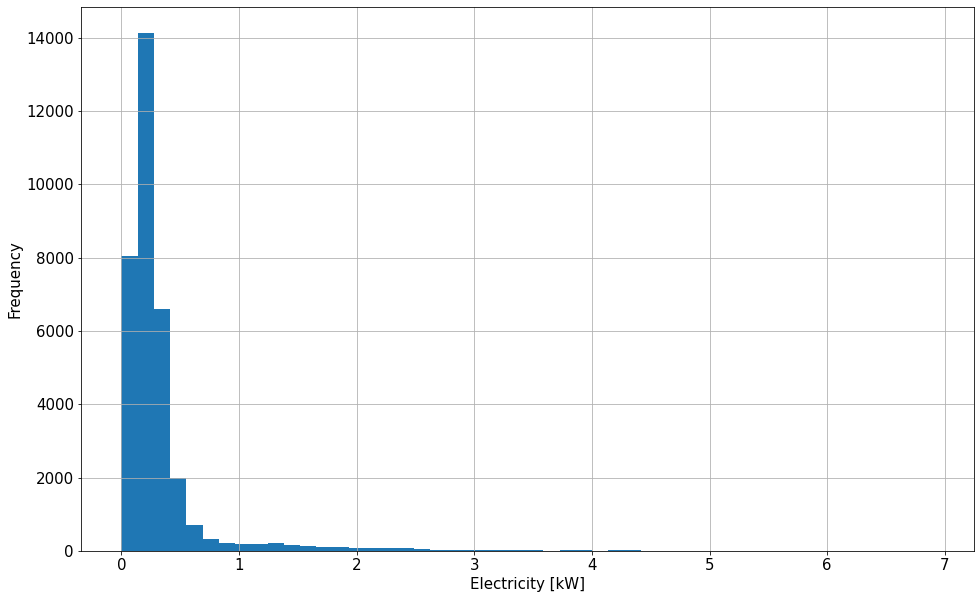

In [ ]:
plt.hist(demand1D, bins=50)
plt.xlabel('Electricity [kW]')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In the next lecture, we will take at some data-driven techniques to analyzing and better understanding the periodicity in the data. For now, we will explore the two other forms of better visualizing information we discussed earlier.

### Filtering

The averages we calculated above are much easier to interpret than the raw time series, as they allow us to quickly identify trends and possible seasonalities. However, it is possible to make the signal and suppress the noise by implementing different types of filters. Here, we will implement a very simple moving average filter. This has the effect of suppressing high frequency variations in the time series. You can use the _rolling_ function from pandas to achieve this. As argument to _rolling_ , you can provide the strength of the filter, a stronger filter will lead to a smoother time series.

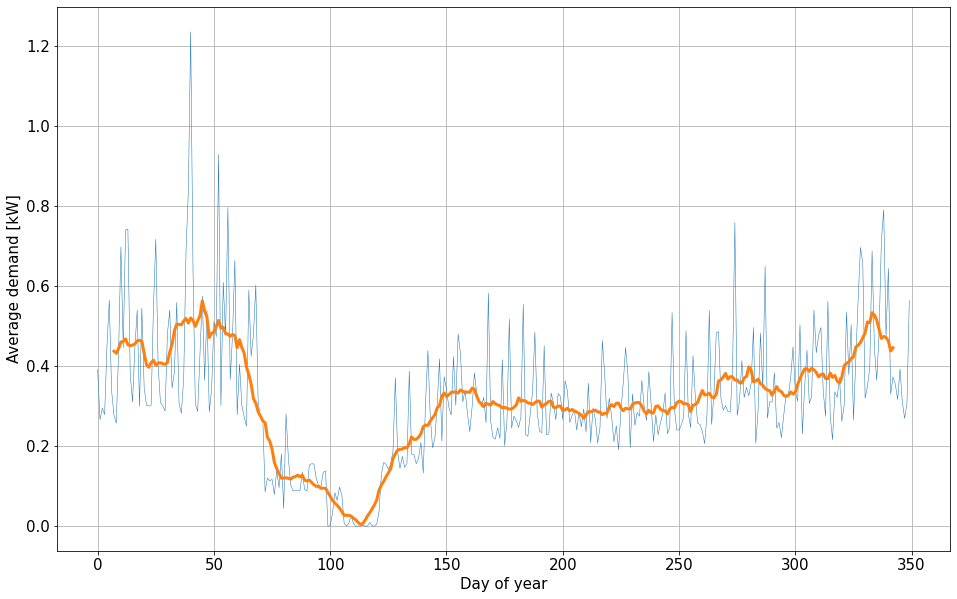

In [ ]:
plt.plot(np.mean(demand2D, 1), linewidth=0.5)
plt.plot(pd.Series(np.mean(demand2D, 1)).rolling(
    15, center=True).mean(), linewidth=3)
plt.xlabel('Day of year')
plt.ylabel('Average demand [kW]')
plt.grid(True)
plt.show()

From the moving average, it appears that there is some difference between the winter and summer energy demand (by almost 30% or even more). This can be explained both by electric heating, as well as higher appliance load during winter (for instance need for lighting during the darker winter months). 

We can apply a similar filter to the time-of-day energy demand:

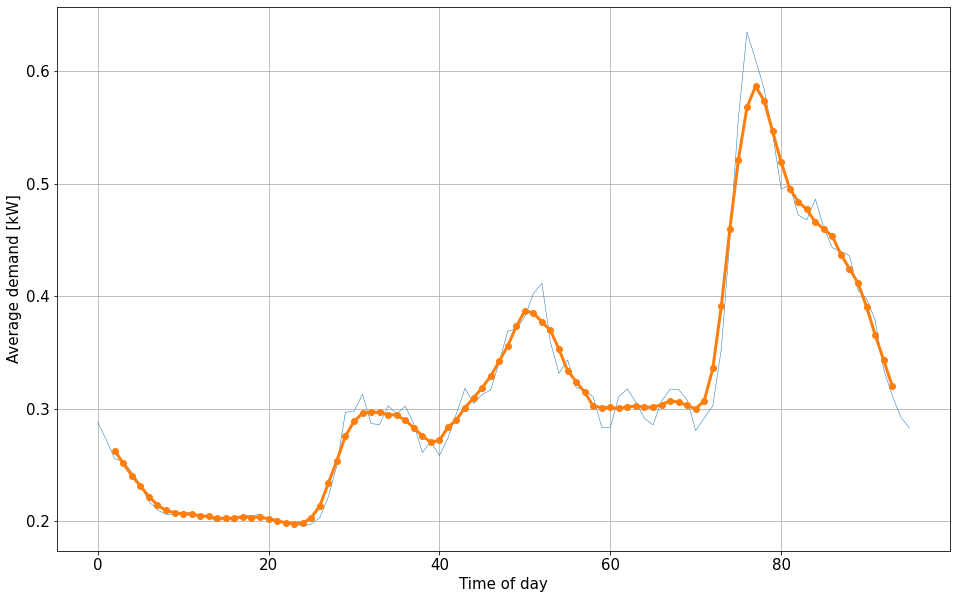

In [ ]:
plt.plot(np.mean(demand2D, 0), linewidth=0.5)
plt.plot(pd.Series(np.mean(demand2D, 0)).rolling(
    5, center=True).mean(), 'o-', linewidth=3)
plt.xlabel('Time of day')
plt.ylabel('Average demand [kW]')
plt.grid(True)
plt.show()

Nice. The moving filter removes most of the random fluctuations to reveal a smooth load profile for the household. It also smears the signal a bit (i.e. removes the peakiness); this may or may not be desirable. Edge-preserving and shape-preserving filters can be used to smooth time series, while still preserving the signal. However, this will not be covered in the course.

### Resampling data

The final technique to clearly visualize data is to directly resample it. This has the effect of reducing the temporal resolution of your input time series. In many real life situations, you may not need to work with quarterly data. In these cases, you can resample quarterly data to hourly data, which is then easier to process and visualize. 

There are a number of ways in which data can be resampled. We already encountered one case where we were calculating the daily average demand (in this case we were downsampling our data from quarterly to daily demand data). However, in this section, we will use the inbuilt functionality from Pandas. This assumes a timestamp to be associated to your data (as the index), which you can then downscale using the _resample_ functionality. We will do this in a slightly roundabout way for a single household (after creating a dataframe for this time series. This is done to also illustrate how to create a new dataframe from scratch. 


In [ ]:
index = pd.date_range(start='2015-01-01', periods=96*350, freq='15T')
new_dataframe = pd.DataFrame(demand1D)
new_dataframe.index = index

Note that you can achieve the same resampling outcome by writing your own code while working with numpy arrays. However, this might increase the probability of bugs, especially because resample exposes multiple time scales (e.g. hourly, daily, weekly etc.) and also mathematical operations (e.g. mean, max etc.) out of the box.

In the next step, we use the resample function to sample data to multiple aggregation levels (hourly, daily, monthly and weekly). Note that we are calculating the resampled value to take on the mean value. 

In [ ]:
hourly_demand = new_dataframe.resample('1H').mean()
daily_demand = new_dataframe.resample('1D').mean()
weekly_demand = new_dataframe.resample('1W').mean()
monthly_demand = new_dataframe.resample('1M').mean()

Now that we have successfully resampled the data, it is possible to plot these time series. However, instead of creating four plots separately, you can also use the _subplot_ functionality from matplotlib. This works remarkably similar to the Matlab subplot functionality.

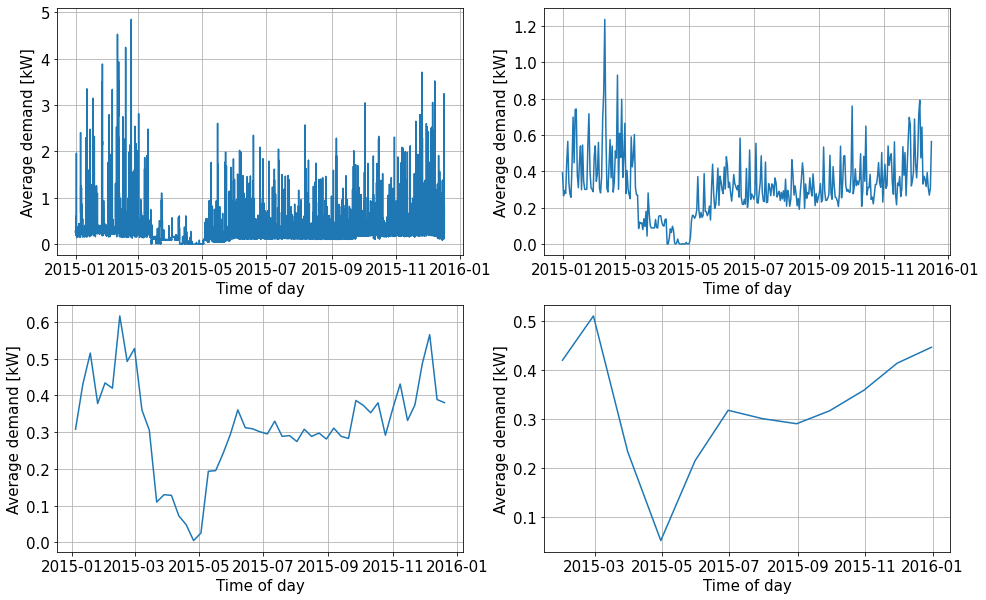

In [ ]:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.plot(hourly_demand)
plt.xlabel('Time of day')
plt.ylabel('Average demand [kW]')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(daily_demand)
plt.xlabel('Time of day')
plt.ylabel('Average demand [kW]')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(weekly_demand)
plt.xlabel('Time of day')
plt.ylabel('Average demand [kW]')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(monthly_demand)
plt.xlabel('Time of day')
plt.ylabel('Average demand [kW]')
plt.grid(True)

plt.show()

### Alternative visualization tools

So far, we have used matplotlib to visualize data. Even though matplotlib is the standard visualization workhorse in python, a number of alternatives such as Bokeh, Altair, Seaborn exist. In this section, we quickly introduce Plotly, a visualization library to create interactive visualizations. Interactivity can greatly enhance the quality and interpretability of visualizations, as we see here:

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(x=np.arange(len(demand1D)), 
                                y=demand1D))
fig.update_layout(xaxis_title='Time of year', 
                  yaxis_title='Electricity demand [kW]')
fig.show()

With this plot, you can easily zoom into your time series to explore fine-grained detail. Another benefit of Plotly (and some of the other more recent visualization tools) is that they can be used directly as an input for dashboarding tools. This allows for not just interactive visualizations, but also interactive processing. Imagine if you could interactively adjust the filter strength (e.g. via a slider) or even choose which sampling interval you were working with using a button. The possibilities of such a framework are endless.

### Exercises 

1. In this section, we have worked with data from a single household. As an exercise, use data from a different household (i.e. a different column in the data we loaded at the beginning of the lecture), and compare the two to see if there are any noticeable differences across the two.
2. How does filtering work in practice? Can you think about the different ways in which you can influence the output of a filter (e.g. choice of kernel, span of filter etc.)
3. What happens if you upsample your data (e.g. resample to 1 minute intervals) as opposed to downsampling? Compare the results with the interpolation function in Python.

## Dealing with missing data

For the final section of this lesson, we will look into ways of dealing with missing data. To do this, we will load four variants of demand data into a single dataframe: the first one is the original consumption data for the first household. The remaining three columns also contain the same demand data, however this has now been corrupted according to three different processes.

In [ ]:
demand = pd.read_csv('LoadData.csv', header=None, usecols=[0])[0:672]
demand['missing1'] = pickle.load(open("LoadData_missing1.p", "rb"))
demand['missing2'] = pickle.load(open("LoadData_missing2.p", "rb"))
demand['missing3'] = pickle.load(open("LoadData_missing3.p", "rb"))

### Finding missing data
There are a number of different ways to look for and fix missing (or anomalous) values in your data. The missingno library is one way to do this, as it allows you to quickly analyze data streams and locate missing values (as nan's). These can take a number of different forms, but we start with a bar chart (using the _bar_ function) that describes the number of non-missing entries in each column of the dataframe we are working with.

Recall that we imported the missingno library at the start of this notebook.

<AxesSubplot:>

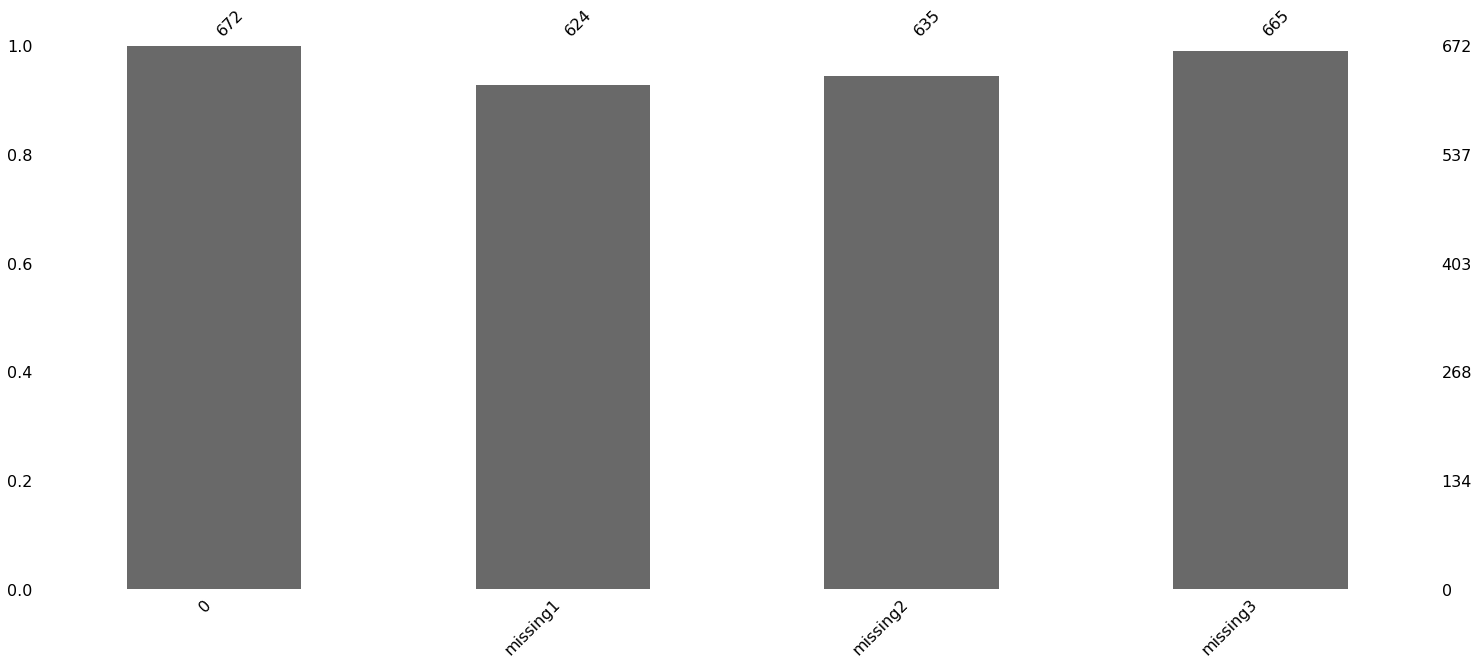

In [ ]:
msno.bar(demand)

This plot already provides us with the information that _missing1_ has the most missing values, while _missing3_ has the least.

The bar chart does not provide any information about the location of these missing values. However, a matrix view can be quite useful to locate them. This view plots out the missing values in each column in the dataframe. To do this, we use the _matrix_ function from the missingno library.

<AxesSubplot:>

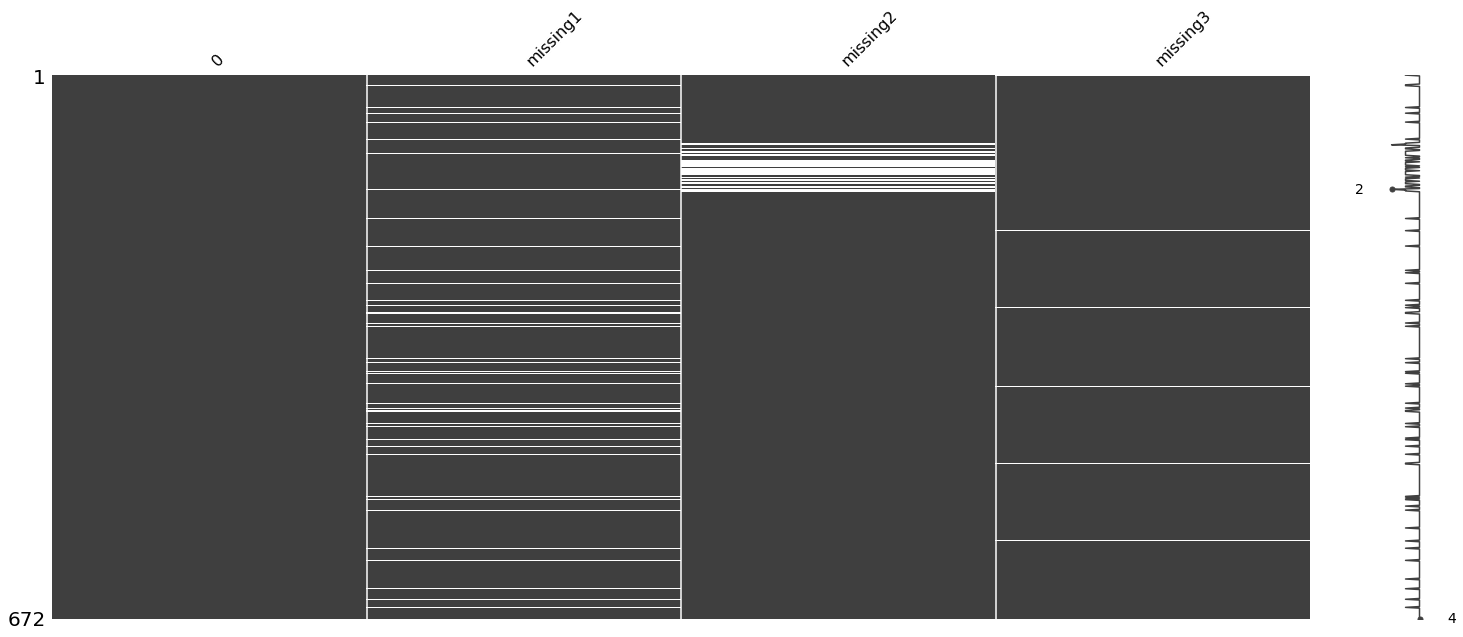

In [ ]:
msno.matrix(demand)

As expected, this view provides much more information about the missing values location, and it seems that all three time series are suffering from different issues. The final functionality that we explore in the missingno library is the _heatmap_ function. This view shows how different time series have missing values at the same location. In reality, this can be to locate if multiple sensors are failing at the same time (which can also be an indication of connectivity issues).

<AxesSubplot:>

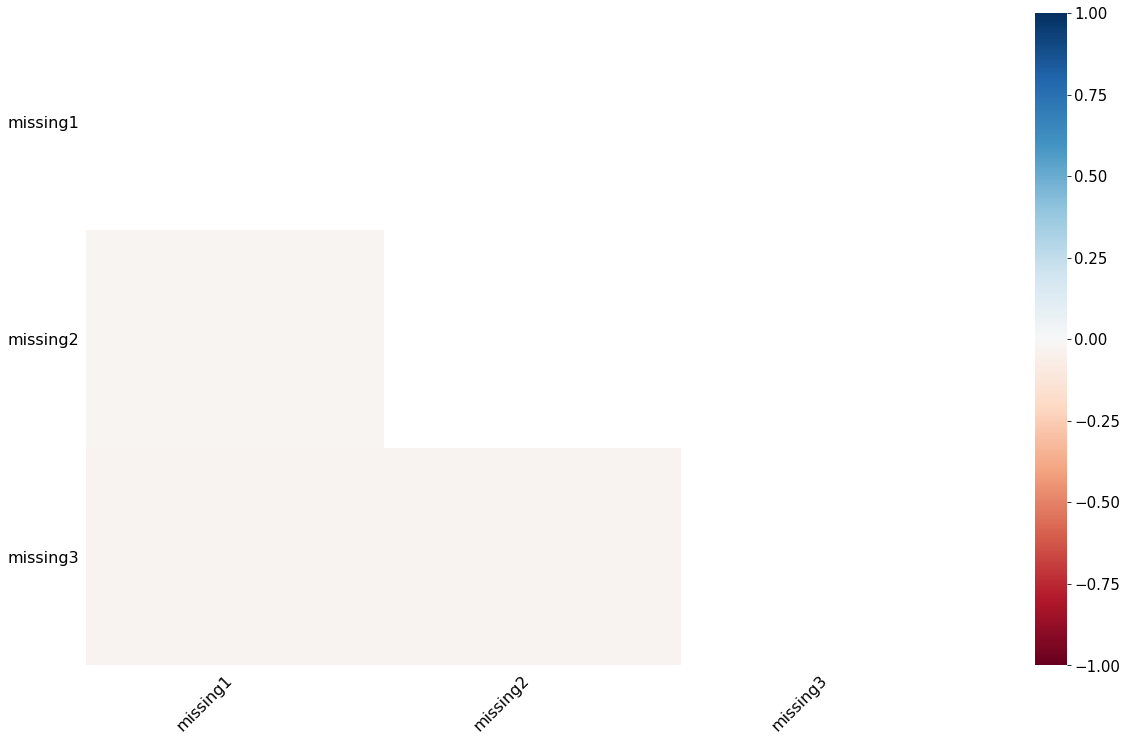

In [ ]:
msno.heatmap(demand)

### Fixing missing data
In many cases, it makes sense for downstream operations to replace missing values by some other values. This can be done in either a naive way as explained here, or through more complicated transformations using machine learning. This latter is beyond the scope of this lesson, however if you are interested, check, for instance, the [fancyimpute](https://pypi.org/project/fancyimpute/) package.

In this section, we start off by making use of the _SimpleImputer_ functionality from scikit learn. The next lecture will deal in much greater detail with scikit learn, one of the core machine learning libraries in Python.

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(demand)
imputed_demand = imp_mean.transform(demand)

Now that we have imputed the missing values in our imputed_demand dataframe, we can visualize this using matplotlib as before. Here, we only plot the second data which had missing data in all the three time series, however you can already see that the imputed values look quite different for the three time series (notice especially issues with time series 2 at the beginning of the day where the imputed value is obviously much higher than the actual value).

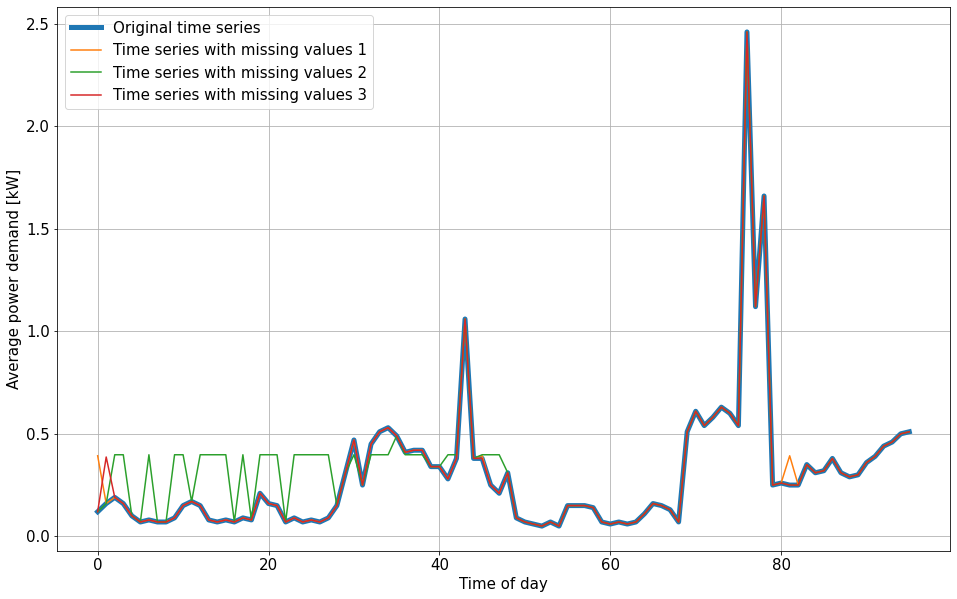

In [ ]:
plt.plot(imputed_demand[96:192, 0], linewidth=5, label='Original time series')
plt.plot(imputed_demand[96:192, 1], label='Time series with missing values 1')
plt.plot(imputed_demand[96:192, 2], label='Time series with missing values 2')
plt.plot(imputed_demand[96:192, 3], label='Time series with missing values 3')
plt.xlabel('Time of day')
plt.ylabel('Average power demand [kW]')
plt.grid(True)
plt.legend()
plt.show()

Note that imputing with the mean values can also be done in pandas directly, using the _fillna_ function.

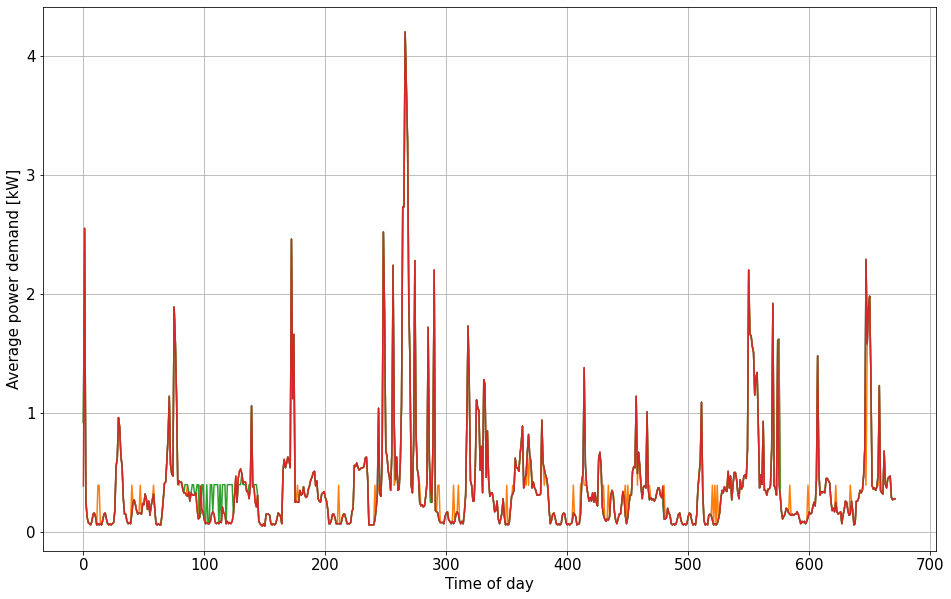

In [ ]:
imputed_demand_filled = demand.fillna(np.mean(demand), inplace=False)

plt.plot(imputed_demand_filled)
plt.xlabel('Time of day')
plt.ylabel('Average power demand [kW]')
plt.grid(True)
plt.show()

It is always a good idea to use the _matrix_ function introduced earlier to see the missing values after the impute operation has been applied. Ideally, these should be resolved by now.

<AxesSubplot:>

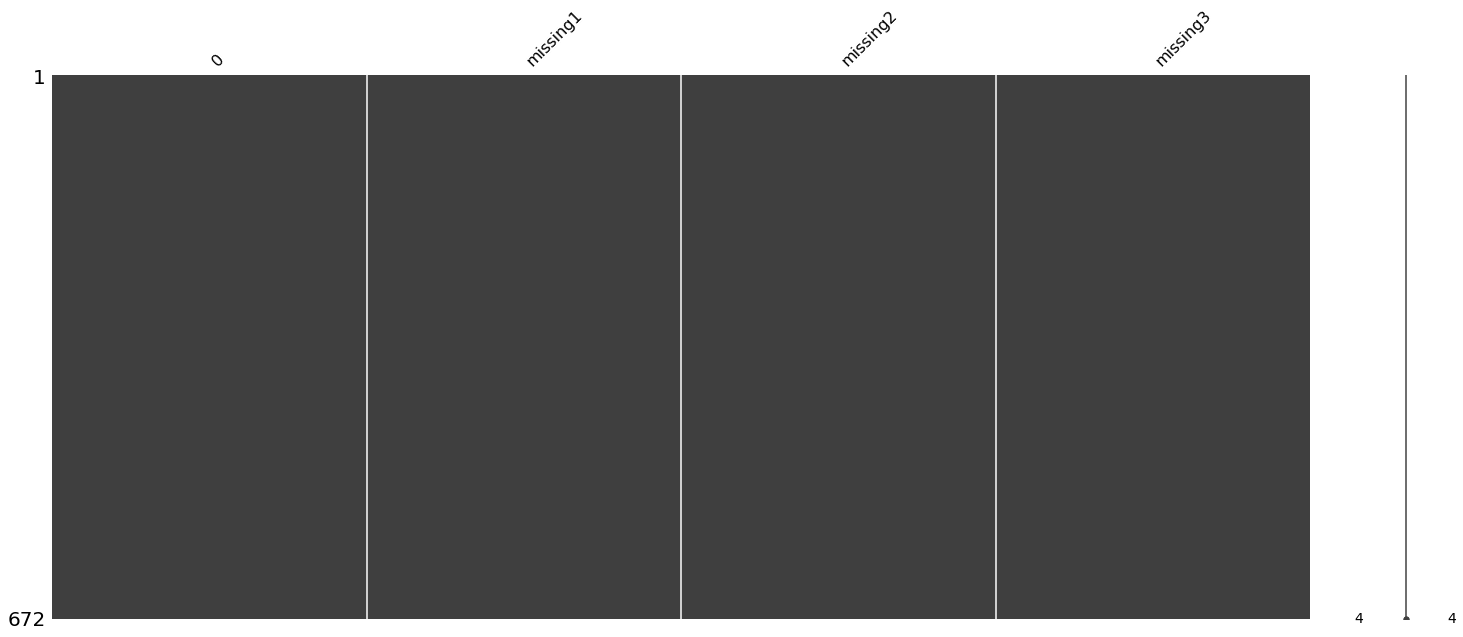

In [ ]:
msno.matrix(imputed_demand_filled)

So the imputer has worked as expected, and there are no missing data points now (compare with the original matrix visualization). However, one problem with applying the mean as the imputed value is that it can change the distribution of the data. This is especially true when there is temporal structure in the time series which has missing values. One way to solve this is through using either the _ffill_ (forward fill) or the _bfill_ (backward fill) commands. The forward fill option will propagate last valid observation forward, while the backward fill option will do the opposite.

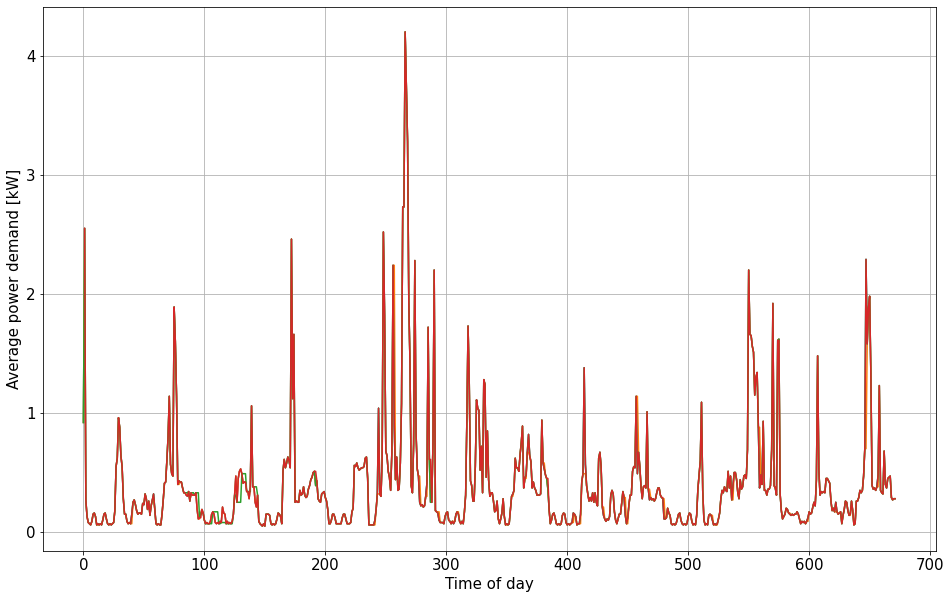

In [ ]:
imputed_demand_ffill = demand.fillna(method='ffill', inplace=False)

plt.plot(imputed_demand_ffill)
plt.xlabel('Time of day')
plt.ylabel('Average power demand [kW]')
plt.grid(True)
plt.show()

As before, the missing number matrix tool can be used to ascertain that the missing values have indeed been imputed. It is also possible to apply interpolation to fill the missing values (as opposed to filling with mean or identical values). In this case, you also have the option to specify the interpolation method. This functionality is also provided by Pandas natively.

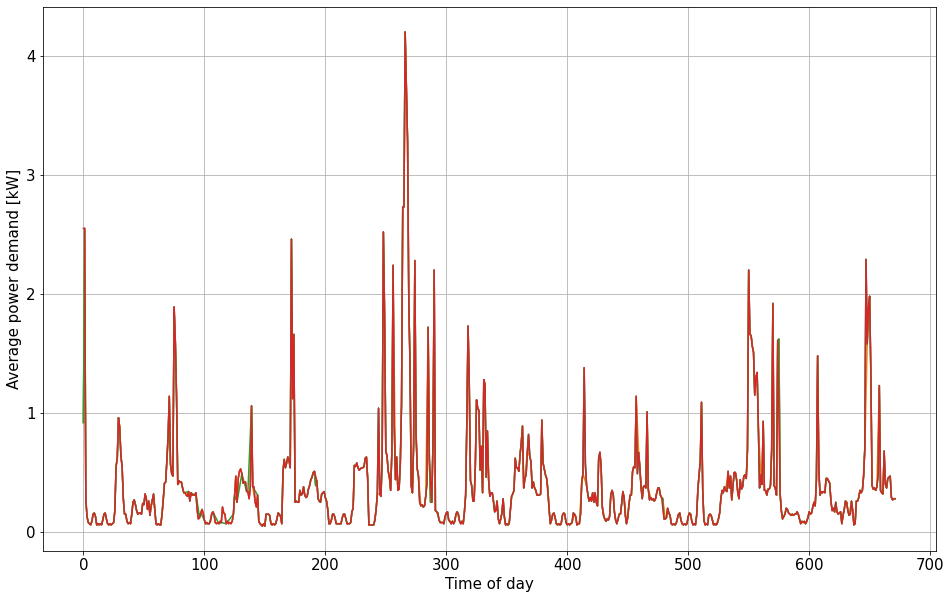

In [ ]:
linear_interpolated_demand = demand.interpolate(
    method='linear', limit_direction='both')
plt.plot(linear_interpolated_demand)
plt.xlabel('Time of day')
plt.ylabel('Average power demand [kW]')
plt.grid(True)
plt.show()

If you have reason to suspect that the data is distributed according to a polynomial distribution of higher order, you can also specify this in pandas as follows. However, this should be applied carefully. Even though linear interpolation will never go beyond the actual signal, quadratic and higher degree interpolations can cause the signal to exceed the original minima and maxima - which may be undesired behavior.

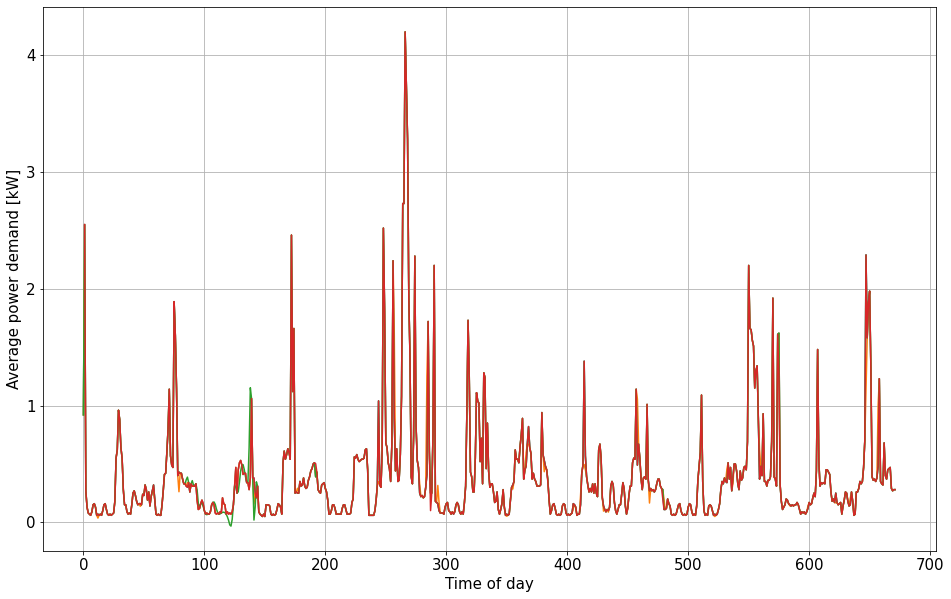

In [ ]:
quad_interpolated_demand = demand.interpolate(method='polynomial', order=2)
plt.plot(quad_interpolated_demand)
plt.xlabel('Time of day')
plt.ylabel('Average power demand [kW]')
plt.grid(True)
plt.show()

As you can see with the quadratic interpolation, the signal goes negative around time step 120. This is physically impossible for electricity demand. Another thing to observe here is that although the interpolation quality with filling the mean value was quite bad for signal 2, linear interpolation works quite well in comparison.

### Exercises

1. How does (linear) interpolation work in practice?
2. Can you think of situations where one impute method might be more suitable than the rest?
3. How can you compare the quality of your impute methods?

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b21ecfca-1024-46a4-860c-35a51c91b2b7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>